##  MODEL 2: POLYNOMIAL REGRESSION (SYNTHETIC DATA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# create synthetic data

In [3]:
np.random.seed(0)

In [4]:
X = np.linspace(0,10, 50).reshape(-1,1)
y = 2 * X.flatten()**2 +3*X.flatten() + 5 + np.random.randn(50)*10


In [12]:
z = np.linspace(0,10, 50)
z=z.reshape(2,-1)
z.shape

(2, 25)

In [6]:
X.shape

(50, 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state=42)


In [15]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [16]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [17]:
y_predict = model.predict(X_test_poly)

In [18]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [19]:
mse

89.16235695455858

In [20]:
r2

0.9779125001763692

In [24]:
X_test.shape

(15, 1)

In [28]:
X_line = np.linspace(X_test.min(), X_test.max(), 200).reshape(-1, 1)
X_line_poly = poly.transform(X_line)
y_line = model.predict(X_line_poly)

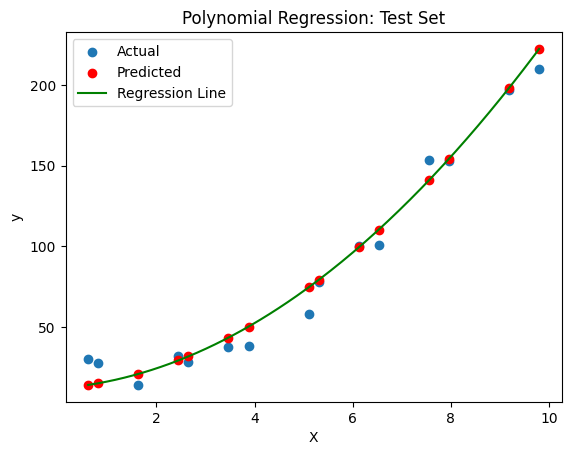

In [29]:
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_predict, color='red', label='Predicted')
plt.plot(X_line, y_line, color='green', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression: Test Set')
plt.legend()
plt.show()